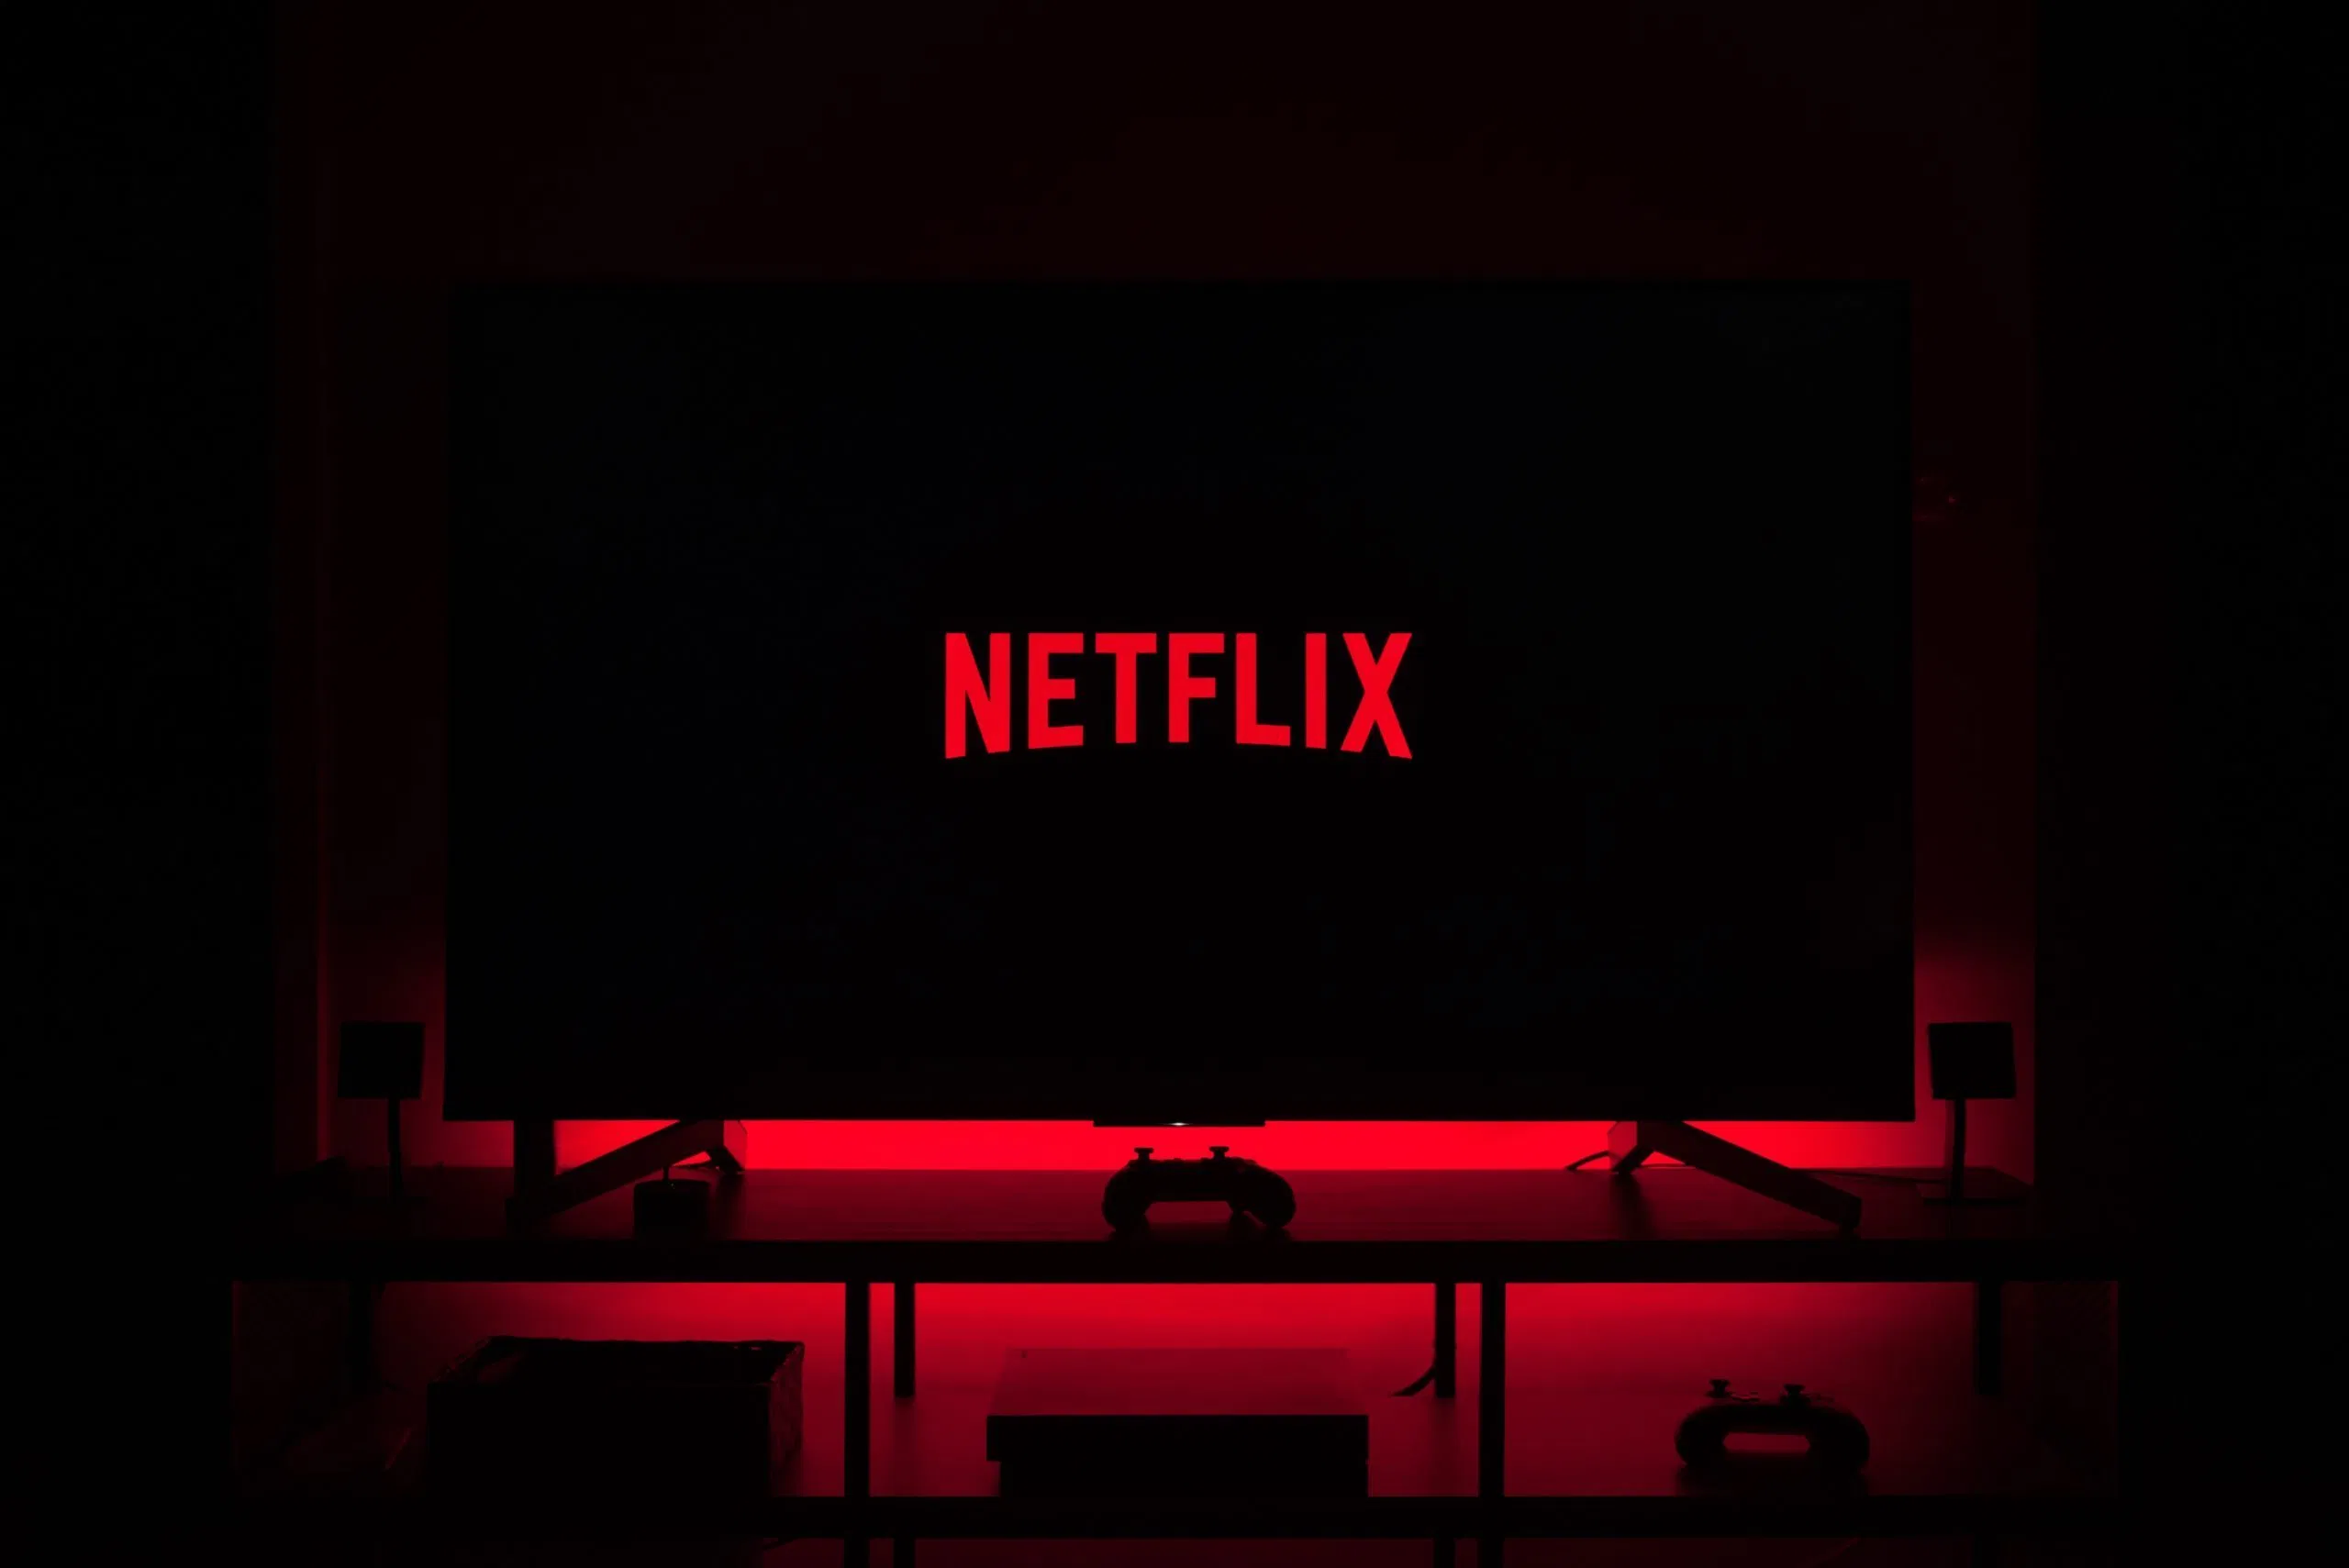

# NETFLIX
Netflix, Inc. is an American technology & media-services provider and production company headquartered in Los Gatos, California, founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. The company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television programs, including those produced in-house.[14] As of April 2020, Netflix had over 193 million paid subscriptions worldwide, including 73 million in the United States.[15] It is available worldwide except in the following: mainland China (due to local restrictions), Iran, Syria, North Korea, and Crimea (due to U.S. sanctions)

# If you like please upvote

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Load the dataset
dataset = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [ ]:
# First 5 rows
dataset.head()

# EDA - Exploratory Data Analysis

In [ ]:
# Some important information
print(dataset.info())

print("---------------------")
print("---------------------")

# Sum of Null values
print(dataset.isna().sum())

In [ ]:
# fill the null value
def fill_null(colname,fillvalue):
    dataset[colname].fillna(fillvalue, inplace=True)

In [ ]:
# Fill director column
fill_null("director", "Unknown")
# Fill cast column
fill_null("cast", "Unknown")
# Fill country column
fill_null("country", "Unknown")

In [ ]:
# Frequency for movie and tv series release
def yearly_release(MovieOrShow):
    movie_release = dataset[dataset["type"]==MovieOrShow][["release_year"]]
    movie_release["release_year"].value_counts()[:20].plot(kind="bar", color="#fb732c", figsize=(15,7))
    plt.title(f"Frequency of {MovieOrShow}", fontweight="bold")

In [ ]:
# Movie relsease yearly
yearly_release("Movie")

In [ ]:
# Tv Show release Yearly
yearly_release("TV Show")

In [ ]:
#top 20 countries
country_movie = dataset["country"].value_counts()[:20]
plt.subplots(figsize=(10,8))
sns.barplot(y=country_movie.index, x=country_movie, palette="deep", data=dataset)

# Most of the movie or show produced from United States. 2nd position India

In [ ]:
# Content Based on Age

def rating_plot(title, height, h_lim=None):
    ratofmortv = dataset[dataset["type"]==title]
    rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
    movie_rating = ratofmortv['rating'].value_counts()[rating_order]

    fig, ax = plt.subplots(figsize=(10,6), dpi=100)
    if h_lim:
        ax.set_ylim(0, h_lim)
    ax.bar(movie_rating.index, movie_rating, color="#e0e0e0", width=0.52, edgecolor="black")
    
    color = ["green", "blue", "orange", "red"]
    span_range = [[0,2], [3,6], [7,8],[9,11]]
    
    for idx, sub_title in enumerate(["Little Kid", "Older Kid", "Tenns", "Mature"]):
        ax.annotate(sub_title, xy=(sum(span_range[idx])/2, height), xytext=(0,0), textcoords="offset points", va="center", ha="center", color="b", fontsize=16, fontweight="bold")
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
        ax.set_title(f'Distribution of {title} Rating', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))

In [ ]:
# For Movie 
rating_plot("Movie", 1200, 1400)

# Netflix has lot of Mature content
## "TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only. Using this rating, the TVPG warns viewers that the show's content contains foul language, graphic violence, graphic sexual activity or any combination of these elements.

## "TV-14" This rating contains mild to strong realistic violence (including some blood-letting), sexual references (including censored and/or partial nudity and medium to high-level implied scenes of sexual intercourse), mild to moderate use of language (strong language is usually censored using a "bleep censor"), and sexual innuendo.  

In [ ]:
# different countries and their watching rating

def co_rat(*argv):
    country1 = argv[0]
    country2 = argv[1]
    country3 = argv[2]
    plt.subplots(figsize=(12,6))
    plt.xticks(rotation=90)

    newdataset = dataset[(dataset["country"]==country1) | (dataset["country"]==country2) | (dataset["country"]==country3)][["country", "type", "rating"]]
    sns.countplot(x=newdataset["rating"], hue=newdataset["country"], data=newdataset)

In [ ]:
co_rat("United States", "India", "United Kingdom")

In [ ]:
# some old movies from 1970 to back
OldMovie = dataset[(dataset["type"]=="Movie") & (dataset["release_year"] <= 1970)].sort_values(by="release_year", ascending=False)[["title", "duration", "rating", "release_year"]]
Old_Movie = pd.DataFrame(OldMovie)

In [ ]:
Old_Movie

In [ ]:
# some old TV Show from 1990 to back
OldTvShow = dataset[(dataset["type"]=="TV Show") & (dataset["release_year"] <= 1990)].sort_values(by="release_year", ascending=False)[["title", "duration", "rating", "release_year"]]
Old_TvShow = pd.DataFrame(OldTvShow)

In [ ]:
Old_TvShow

In [ ]:
# Movie and Director
movie_director = dataset[dataset["type"]=="Movie"]
directorfilm = movie_director["director"].value_counts()[1:]
director_films = pd.DataFrame(directorfilm)

In [ ]:
director_films[:30].plot(kind="bar",figsize=(10,6))
plt.title("30 Director and their total Movie count")

In [ ]:
# TV Show and Director
tv_director = dataset[dataset["type"]=="TV Show"]
directortv = tv_director["director"].value_counts()[1:]
director_tv = pd.DataFrame(directortv)

In [ ]:
director_tv[:30].plot(kind="bar", figsize=(10,6))
plt.title("30 Director and their total TV Show count")

In [ ]:
# content of director

def director_and_movie_tv(name):
    director = dataset.loc[dataset["director"]==name][["country", "rating", "title"]]
    return director

director_and_movie_tv("Raúl Campos, Jan Suter")

# If you like please upvote 